In [3]:
%pip install xlrd
%pip install xlwt

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 685.6 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100
df = pd.read_excel('/Users/nikitaromanov/Downloads/students_internet_performance.xls')
df = df.drop('Unnamed: 0', axis=1)

In [25]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,studytime,schoolsup,famsup,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,failures_PORTUGESE,paid_PORTUGESE,absences_PORTUGESE,finalGrade_PORTUGESE,failures_MATH,paid_MATH,absences_MATH,finalGrade_MATH
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,2,yes,no,no,yes,yes,no,no,4,3,4,3,0,no,4,11,0,no,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,2,no,yes,no,no,yes,yes,no,5,3,3,3,0,no,2,11,0,no,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,2,yes,no,no,yes,yes,yes,no,4,3,2,3,0,no,6,12,3,yes,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,3,no,yes,yes,yes,yes,yes,yes,3,2,2,5,0,no,0,14,0,yes,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,2,no,yes,no,yes,yes,no,no,4,3,2,5,0,no,0,13,0,yes,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,MS,F,19,R,GT3,T,2,3,services,other,course,3,no,no,yes,no,yes,yes,no,5,4,2,5,1,no,4,10,1,no,0,0
366,MS,F,18,U,LE3,T,3,1,teacher,services,course,2,no,yes,no,yes,yes,yes,no,4,3,4,1,0,no,4,16,0,yes,0,8
367,MS,F,18,U,GT3,T,1,1,other,other,course,2,no,no,yes,yes,yes,no,no,1,1,1,5,0,no,6,9,1,no,0,0
368,MS,M,17,U,LE3,T,3,1,services,services,course,1,no,no,no,no,yes,yes,no,2,4,5,2,0,no,6,10,0,no,3,16


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   school                370 non-null    object
 1   sex                   370 non-null    object
 2   age                   370 non-null    int64 
 3   address               370 non-null    object
 4   famsize               370 non-null    object
 5   Pstatus               370 non-null    object
 6   Medu                  370 non-null    int64 
 7   Fedu                  370 non-null    int64 
 8   Mjob                  370 non-null    object
 9   Fjob                  370 non-null    object
 10  reason                370 non-null    object
 11  studytime             370 non-null    int64 
 12  schoolsup             370 non-null    object
 13  famsup                370 non-null    object
 14  activities            370 non-null    object
 15  nursery               370 non-null    ob

In [9]:
df.describe()

,Unnamed: 0,age,Medu,Fedu,studytime,famrel,freetime,goout,health,failures_PORTUGESE,absences_PORTUGESE,finalGrade_PORTUGESE,failures_MATH,absences_MATH,finalGrade_MATH
count,370.00000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,184.50000,16.575676,2.800000,2.556757,2.043243,3.935135,3.224324,3.116216,3.562162,0.132432,3.632432,12.554054,0.278378,5.381081,10.464865
std,106.95404,1.180672,1.083505,1.086138,0.847934,0.911301,0.985506,1.128592,1.407558,0.489762,4.827656,2.943653,0.710599,7.665653,4.608830
min,0.00000,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92.25000,16.000000,2.000000,2.000000,1.000000,4.000000,3.000000,2.000000,3.000000,0.000000,0.000000,11.000000,0.000000,0.000000,8.000000
50%,184.50000,17.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.000000,4.000000,0.000000,2.000000,13.000000,0.000000,4.000000,11.000000
75%,276.75000,17.000000,4.000000,3.750000,2.000000,5.000000,4.000000,4.000000,5.000000,0.000000,6.000000,14.000000,0.000000,8.000000,14.000000
max,369.00000,22.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,3.000000,32.000000,19.000000,3.000000,75.000000,20.000000


In [17]:
df.dtypes

school                  object
sex                     object
age                      int64
address                 object
famsize                 object
Pstatus                 object
Medu                     int64
Fedu                     int64
Mjob                    object
Fjob                    object
reason                  object
studytime                int64
schoolsup               object
famsup                  object
activities              object
nursery                 object
higher                  object
internet                object
romantic                object
famrel                   int64
freetime                 int64
goout                    int64
health                   int64
failures_PORTUGESE       int64
paid_PORTUGESE          object
absences_PORTUGESE       int64
finalGrade_PORTUGESE     int64
failures_MATH            int64
paid_MATH               object
absences_MATH            int64
finalGrade_MATH          int64
dtype: object

In [24]:
df.select_dtypes(include=['object']).columns.to_list()

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'schoolsup',
 'famsup',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'paid_PORTUGESE',
 'paid_MATH']

In [32]:
numerical = ['age', 'finalGrade_MATH', 'absences_MATH', 'failures_MATH', 'finalGrade_PORTUGESE', 'absences_PORTUGESE', 'failures_PORTUGESE']

In [114]:
categorical = df.drop(numerical + ['mean_score','mean_exams', 'mean_absences'], axis=1).columns.to_list()
cat_df = df[categorical]
cat_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,studytime,schoolsup,famsup,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,paid_PORTUGESE,paid_MATH,good_at_math,good_at_portugese
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,2,yes,no,no,yes,yes,no,no,4,3,4,3,no,no,0.0,1.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,2,no,yes,no,no,yes,yes,no,5,3,3,3,no,no,0.0,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,2,yes,no,no,yes,yes,yes,no,4,3,2,3,no,yes,0.0,1.0
3,GP,F,15,U,GT3,T,4,2,health,services,home,3,no,yes,yes,yes,yes,yes,yes,3,2,2,5,no,yes,1.0,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,2,no,yes,no,yes,yes,no,no,4,3,2,5,no,yes,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,MS,F,19,R,GT3,T,2,3,services,other,course,3,no,no,yes,no,yes,yes,no,5,4,2,5,no,no,0.0,0.0
366,MS,F,18,U,LE3,T,3,1,teacher,services,course,2,no,yes,no,yes,yes,yes,no,4,3,4,1,no,yes,0.0,1.0
367,MS,F,18,U,GT3,T,1,1,other,other,course,2,no,no,yes,yes,yes,no,no,1,1,1,5,no,no,0.0,0.0
368,MS,M,17,U,LE3,T,3,1,services,services,course,1,no,no,no,no,yes,yes,no,2,4,5,2,no,no,1.0,0.0


In [115]:
cat_df = cat_df.astype('category')
for column in cat_df.columns.to_list():
    cat_df[column] = cat_df[column].cat.codes
# cat_df = cat_df.join(df[numerical])

In [119]:
df[['mean_score','mean_exams', 'mean_absences']]

,mean_score,mean_exams,mean_absences
0,8.5,0.0,5.0
1,8.5,0.0,3.0
2,11.0,1.5,8.0
3,14.5,0.0,1.0
4,11.5,0.0,2.0
...,...,...,...
365,5.0,1.0,2.0
366,12.0,0.0,2.0
367,4.5,0.5,3.0
368,13.0,0.0,4.5


In [388]:
corr_df.join()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,studytime,schoolsup,famsup,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,paid_PORTUGESE,paid_MATH,good_at_math,good_at_portugese,cluster,mean_score,mean_exams,mean_absences
0,0,0,3,1,0,0,4,4,0,4,0,1,1,0,0,1,1,0,0,3,2,3,2,0,0,0,1,2,8.5,0.0,5.0
1,0,0,2,1,0,1,1,1,0,2,0,1,0,1,0,0,1,1,0,4,2,2,2,0,0,0,1,0,8.5,0.0,3.0
2,0,0,0,1,1,1,1,1,0,2,2,1,1,0,0,1,1,1,0,3,2,1,2,0,1,0,1,0,11.0,1.5,8.0
3,0,0,0,1,0,1,4,2,1,3,1,2,0,1,1,1,1,1,1,2,1,1,4,0,1,1,1,3,14.5,0.0,1.0
4,0,0,1,1,0,1,3,3,2,2,1,1,0,1,0,1,1,0,0,3,2,1,4,0,1,0,1,3,11.5,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,1,0,4,0,0,1,2,3,3,2,0,2,0,0,1,0,1,1,0,4,3,1,4,0,0,0,0,1,5.0,1.0,2.0
366,1,0,3,1,1,1,3,1,4,3,0,1,0,1,0,1,1,1,0,3,2,3,0,0,1,0,1,2,12.0,0.0,2.0
367,1,0,3,1,0,1,1,1,2,2,0,1,0,0,1,1,1,0,0,0,0,0,4,0,0,0,0,0,4.5,0.5,3.0
368,1,1,2,1,1,1,3,1,3,3,0,0,0,0,0,0,1,1,0,1,3,4,1,0,0,1,0,1,13.0,0.0,4.5


In [390]:
import scipy
sns.heatmap(scipy.stats.spearmanr(corr_df), square = True, annot=True)

ValueError: Must pass 2-d input. shape=(2, 31, 31)

In [401]:
cat_df.join(df[['mean_score','mean_exams', 'mean_absences']]).drop(['good_at_math', 'good_at_portugese'], axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,studytime,schoolsup,famsup,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,paid_PORTUGESE,paid_MATH,cluster,mean_score,mean_exams,mean_absences
0,0,0,3,1,0,0,4,4,0,4,0,1,1,0,0,1,1,0,0,3,2,3,2,0,0,2,8.5,0.0,5.0
1,0,0,2,1,0,1,1,1,0,2,0,1,0,1,0,0,1,1,0,4,2,2,2,0,0,0,8.5,0.0,3.0
2,0,0,0,1,1,1,1,1,0,2,2,1,1,0,0,1,1,1,0,3,2,1,2,0,1,0,11.0,1.5,8.0
3,0,0,0,1,0,1,4,2,1,3,1,2,0,1,1,1,1,1,1,2,1,1,4,0,1,3,14.5,0.0,1.0
4,0,0,1,1,0,1,3,3,2,2,1,1,0,1,0,1,1,0,0,3,2,1,4,0,1,3,11.5,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,1,0,4,0,0,1,2,3,3,2,0,2,0,0,1,0,1,1,0,4,3,1,4,0,0,1,5.0,1.0,2.0
366,1,0,3,1,1,1,3,1,4,3,0,1,0,1,0,1,1,1,0,3,2,3,0,0,1,2,12.0,0.0,2.0
367,1,0,3,1,0,1,1,1,2,2,0,1,0,0,1,1,1,0,0,0,0,0,4,0,0,0,4.5,0.5,3.0
368,1,1,2,1,1,1,3,1,3,3,0,0,0,0,0,0,1,1,0,1,3,4,1,0,0,1,13.0,0.0,4.5


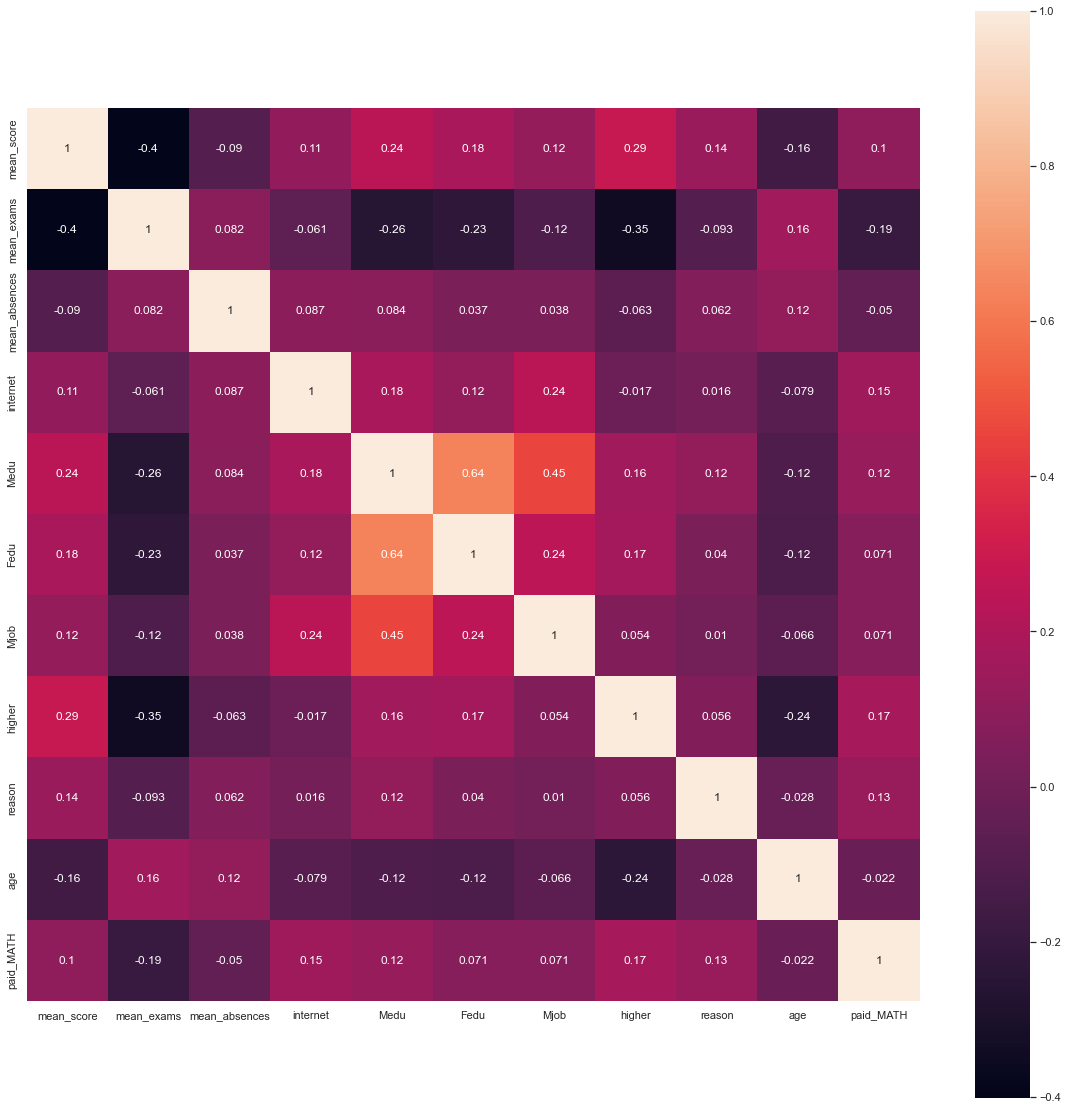

In [456]:
plt.rcParams['figure.figsize']=(20,20)
corr = cat_df.join(df[['mean_score','mean_exams', 'mean_absences']]).drop(['good_at_math', 'good_at_portugese'], axis=1)[['mean_score','mean_exams', 'mean_absences','internet', 'Medu', 'Fedu', 'Mjob', 'higher', 'reason', 'age', 'paid_MATH']].corr()
g = sns.heatmap(corr, square = True, annot=True) # cmap="YlGnBu"

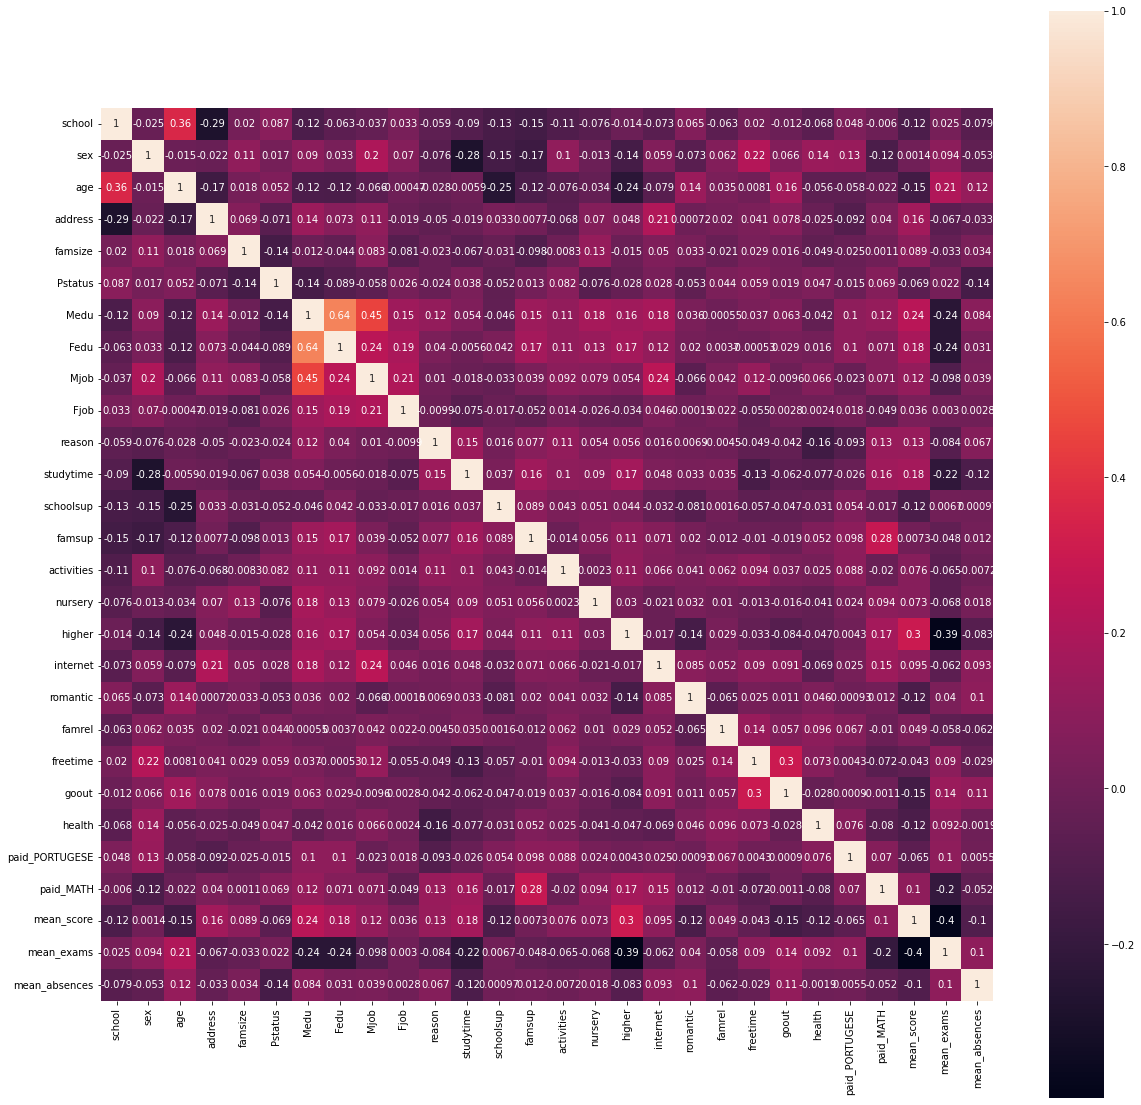

In [201]:
plt.rcParams['figure.figsize']=(20,20)
corr = cat_df.join(df[['mean_score','mean_exams', 'mean_absences']]).drop(['good_at_math', 'good_at_portugese'], axis=1).corr()
g = sns.heatmap(corr, square = True, annot=True) # cmap="YlGnBu"

Положительно влияет на успеваемость:
* higher и reason (хочет ли высшее образование, почему выбрал школу)
* Medu Fedu (образование родителей, особенно важно образование мамы)
* studytime (время учёбы)
* чем хуже здоровье, тем больше интернет влияет на успеваемость 

Отрицательно влияет на успеваемость:
* возраст (чем взрослее, тем больше прогулов, провалов, хуже оценки)

### Графики

In [217]:
c = df[numerical + ['internet']]
c['internet'] = c['internet'].astype('category').cat.codes

/var/folders/6y/0mq5_kf5347crj38jj5xz8pr0000gn/T/ipykernel_20171/3067172364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['internet'] = c['internet'].astype('category').cat.codes


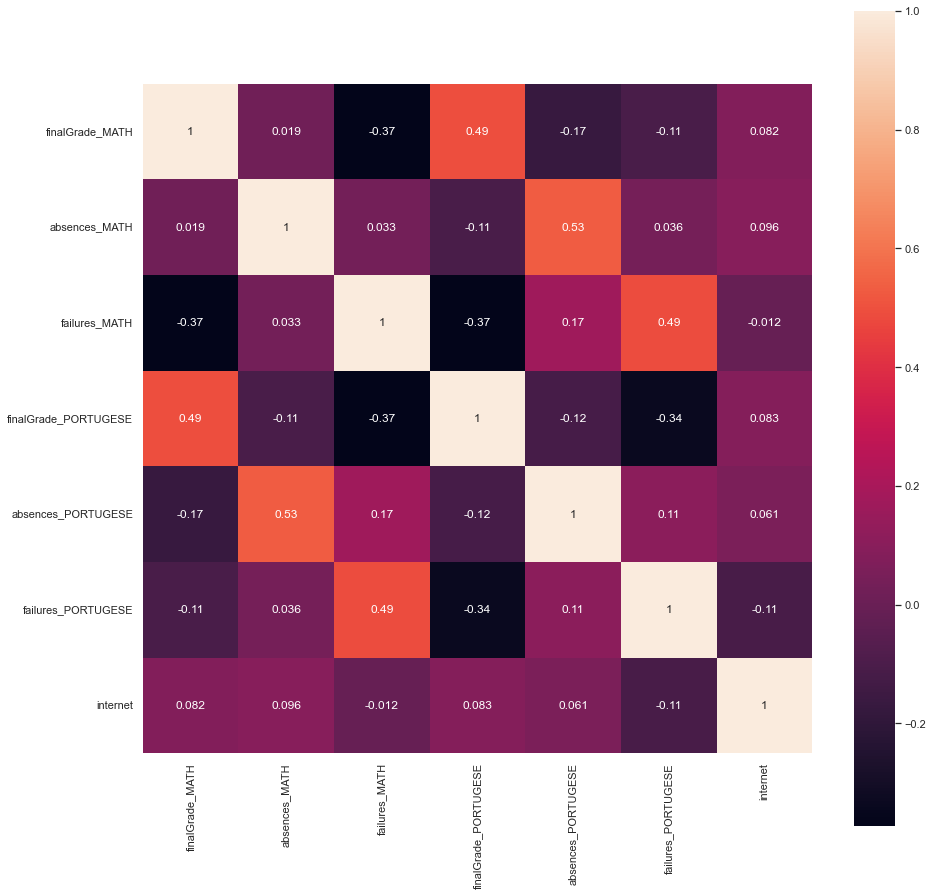

In [449]:
plt.rcParams['figure.figsize']=(15,15)

corr = c.corr()
g = sns.heatmap(corr, square = True, annot=True)

<AxesSubplot:xlabel='age', ylabel='count'>

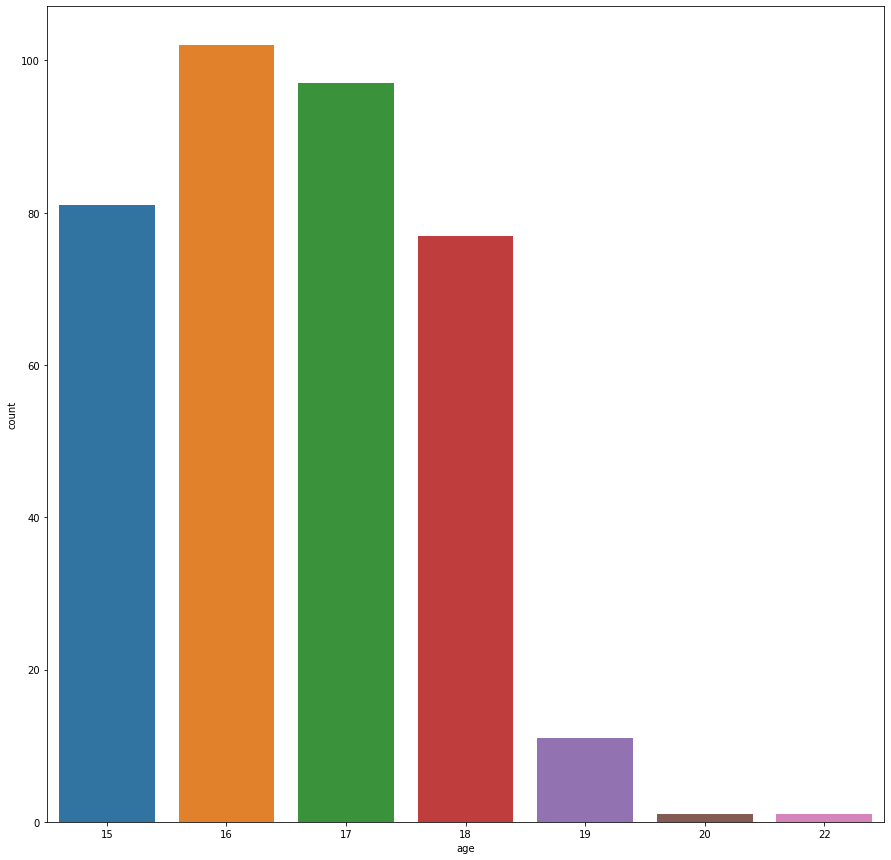

In [29]:
sns.countplot(x='age', data=df)

In [462]:
df[['school','sex']].value_counts() / 368

school  sex
GP      F      0.470109
        M      0.423913
MS      F      0.059783
        M      0.046196
dtype: float64

<AxesSubplot:xlabel='sex', ylabel='count'>

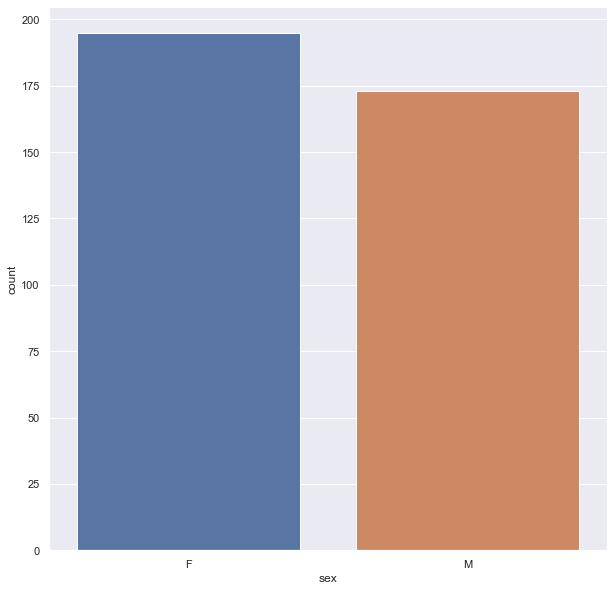

In [458]:
sns.countplot(x='sex', data=df)

<AxesSubplot:xlabel='internet', ylabel='count'>

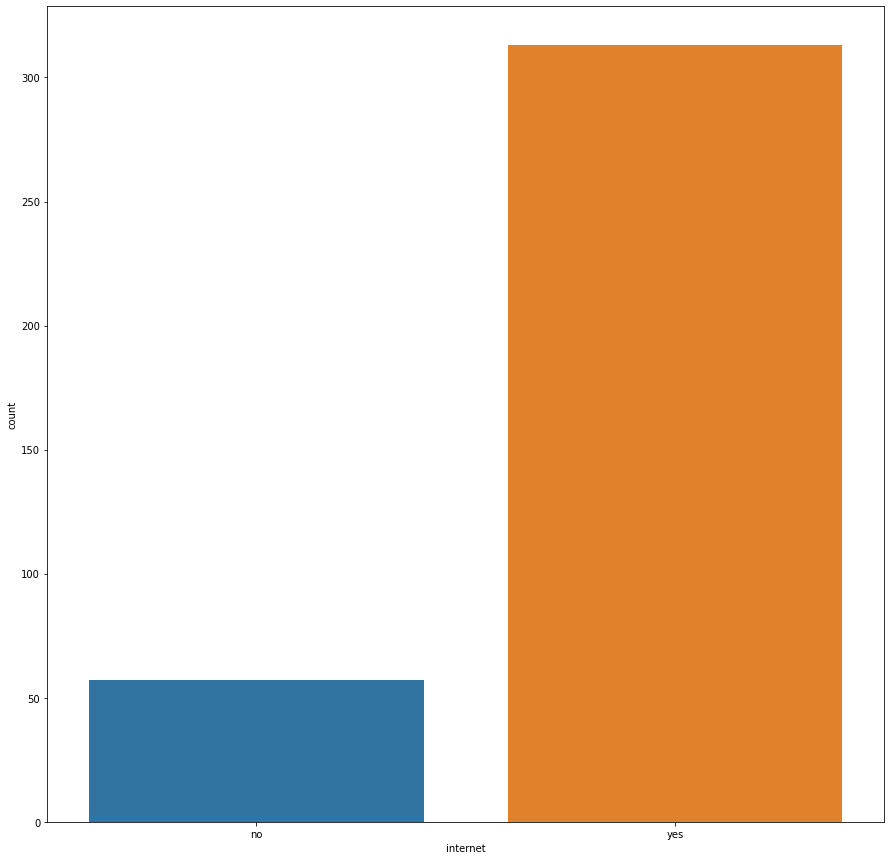

In [67]:
sns.countplot(x='internet', data=df)

In [411]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='mean_score', ylabel='mean_exams'>

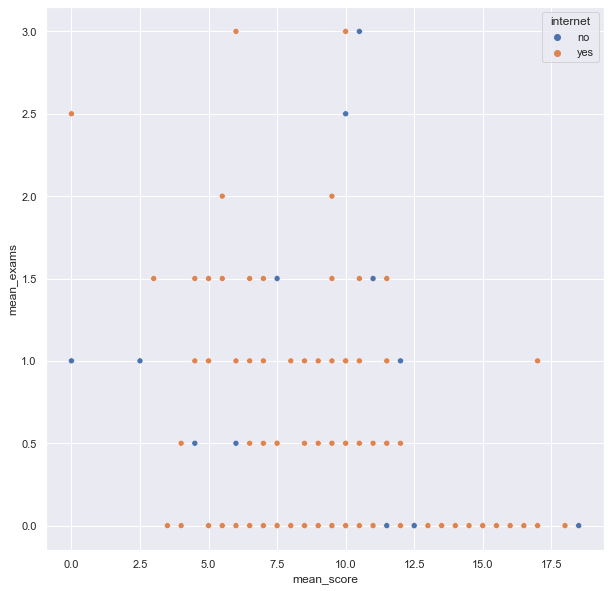

In [457]:
plt.rcParams['figure.figsize']=(10, 10)
sns.scatterplot(y='mean_exams', x='mean_score', data=df, hue='internet')

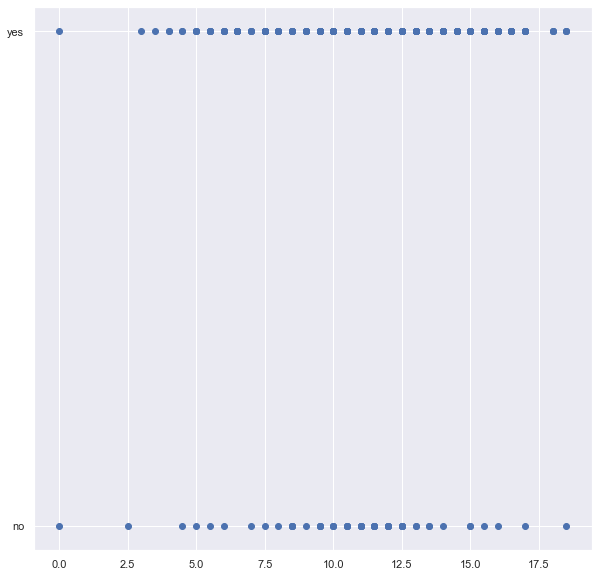

In [419]:
matplotlib.pyplot.scatter(y='internet', x='mean_score', data=df)

In [100]:
df['mean_score'] = (df['finalGrade_MATH'] + df['finalGrade_PORTUGESE']) / 2
df['mean_exams'] = (df['failures_MATH'] + df['failures_PORTUGESE']) / 2
df['mean_absences'] = (df['absences_MATH'] + df['absences_PORTUGESE']) / 2

In [94]:
df.loc[df['finalGrade_MATH'] > 10, 'good_at_math'] = 1
df.loc[df['finalGrade_PORTUGESE'] > 10, 'good_at_portugese'] = 1
df = df.fillna(0)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,studytime,schoolsup,famsup,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,failures_PORTUGESE,paid_PORTUGESE,absences_PORTUGESE,finalGrade_PORTUGESE,failures_MATH,paid_MATH,absences_MATH,finalGrade_MATH,mean_score,mean_exams,good_at_math,good_at_portugese
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,2,yes,no,no,yes,yes,no,no,4,3,4,3,0,no,4,11,0,no,6,6,8.5,5.0,0.0,1.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,2,no,yes,no,no,yes,yes,no,5,3,3,3,0,no,2,11,0,no,4,6,8.5,3.0,0.0,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,2,yes,no,no,yes,yes,yes,no,4,3,2,3,0,no,6,12,3,yes,10,10,11.0,8.0,0.0,1.0
3,GP,F,15,U,GT3,T,4,2,health,services,home,3,no,yes,yes,yes,yes,yes,yes,3,2,2,5,0,no,0,14,0,yes,2,15,14.5,1.0,1.0,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,2,no,yes,no,yes,yes,no,no,4,3,2,5,0,no,0,13,0,yes,4,10,11.5,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,MS,F,19,R,GT3,T,2,3,services,other,course,3,no,no,yes,no,yes,yes,no,5,4,2,5,1,no,4,10,1,no,0,0,5.0,2.0,0.0,0.0
366,MS,F,18,U,LE3,T,3,1,teacher,services,course,2,no,yes,no,yes,yes,yes,no,4,3,4,1,0,no,4,16,0,yes,0,8,12.0,2.0,0.0,1.0
367,MS,F,18,U,GT3,T,1,1,other,other,course,2,no,no,yes,yes,yes,no,no,1,1,1,5,0,no,6,9,1,no,0,0,4.5,3.0,0.0,0.0
368,MS,M,17,U,LE3,T,3,1,services,services,course,1,no,no,no,no,yes,yes,no,2,4,5,2,0,no,6,10,0,no,3,16,13.0,4.5,1.0,0.0


In [103]:
# описание оценок и экзаменов по интернету
x = df.groupby(['internet'])['mean_score'].agg(['mean', 'median', 'std'])
x.columns = ['mean2', 'median2', 'std2']

internet_table = df.groupby(['internet'])['mean_exams'].agg(['mean', 'median', 'std'])
internet_table['mean_exams'] = x['mean2']
internet_table['median_exams'] = x['median2']
internet_table['std_exams'] = x['std2']

x = df.groupby(['internet'])['mean_absences'].agg(['mean', 'median', 'std'])
x.columns = ['mean2', 'median2', 'std2']
internet_table['mean_abs'] = x['mean2']
internet_table['median_abs'] = x['median2']
internet_table['std_abs'] = x['std2']


internet_table.columns = ['Среднее к-ва проваленных экзаменов', 'Медиана провалов', 'Стандартное отклонение провалов', 
'Среднее оценок', 'Медиана оценок', 'Стандартное отклонение оценок', 'Среднее прогулов', 
'Медиана прогулов', 'Стандартное отклонение прогулов']

In [352]:
internet_table[['Среднее к-ва проваленных экзаменов', 'Среднее оценок', 'Среднее прогулов']]

,Среднее к-ва проваленных экзаменов,Среднее оценок,Среднее прогулов
internet,,,
no,0.280702,10.780702,3.307018
yes,0.191693,11.642173,4.725240


In [ ]:
internet_table.to_excel('internet_table.xls')

In [398]:
school_internet = df.groupby(['age'])['mean_score'].agg(['mean', 'count', 'median']) # школа, параметр, две оси
school_internet

,mean,count,median
age,,,
15,11.895062,81,11.5
16,11.862745,102,12.0
17,11.623711,97,12.0
18,10.967532,77,11.5
19,8.181818,11,9.5


In [ ]:
df.groupby(['address', 'internet', 'age'])['mean_score'].agg(['mean', 'count', 'median'])

In [395]:
df.groupby(['address','health'])['mean_score'].agg(['mean', 'count', 'median'])

mean  count  median
address health                          
R       1       11.500000     10   11.75
        2       11.416667      6   11.50
        3       11.026316     19   11.00
        4       11.666667     15   11.50
        5        9.112903     31    9.50
U       1       13.128571     35   13.50
        2       11.777778     36   11.75
        3       11.418033     61   11.50
        4       11.468085     47   11.50
        5       11.722222    108   12.00

In [189]:
df.groupby(['address', 'internet', 'age', ])['mean_exams'].agg(['mean', 'count', 'median', 'std']) # провалено экзаменов

mean  count  median       std
school internet age                                   
GP     no       15   0.055556      9     0.0  0.166667
                16   0.178571     14     0.0  0.464391
                17   0.218750     16     0.0  0.515388
                18   0.500000      6     0.0  1.224745
                19   1.500000      2     1.5  1.414214
                20   1.000000      1     1.0       NaN
       yes      15   0.138889     72     0.0  0.404397
                16   0.142045     88     0.0  0.370995
                17   0.217391     69     0.0  0.603167
                18   0.208333     48     0.0  0.492857
                19   0.500000      5     0.0  0.707107
                22   3.000000      1     3.0       NaN
MS     no       17   0.000000      3     0.0  0.000000
                18   0.300000      5     0.0  0.447214
                19   1.000000      1     1.0       NaN
       yes      17   0.222222      9     0.0  0.363242
                18   0.055556     18     0.0  0.161690
                19   1.333333      3     1.0  0.577350

In [140]:
df.groupby(['internet', 'health'])['mean_absences'].agg(['mean', 'count', 'median', 'std', 'sum']) # прогулы по здоровью?

mean  count  median       std    sum
internet health                                          
no       1       2.250000      4    2.00  1.258306    9.0
         2       4.500000      4    4.00  2.645751   18.0
         3       3.843750     16    3.00  2.820867   61.5
         4       3.777778      9    3.00  2.948634   34.0
         5       2.750000     24    1.00  3.391165   66.0
yes      1       4.976190     42    2.75  7.537672  209.0
         2       4.802632     38    4.00  5.422101  182.5
         3       4.500000     64    3.00  5.078745  288.0
         4       3.707547     53    3.00  3.129318  196.5
         5       5.198276    116    3.00  6.552424  603.0

In [143]:
pd.options.display.max_rows = 100

In [153]:
df.groupby(['address', 'internet', 'age'])['mean_score'].agg(['mean', 'count', 'median'])

mean  count  median
sex internet age                          
F   no       15   10.500000      3   10.50
             16   11.000000      8   11.25
             17   12.000000     14   11.75
             18    9.937500      8   10.00
             19   10.000000      1   10.00
    yes      15   11.042857     35   11.50
             16   11.923913     46   12.00
             17   12.136364     44   12.75
             18   11.421875     32   11.50
             19    8.000000      4    8.25
M   no       15   11.166667      6   11.50
             16   11.416667      6   11.50
             17   10.000000      5   10.00
             18    8.000000      3    9.50
             19    5.750000      2    5.75
             20   16.500000      1   16.50
    yes      15   12.932432     37   13.00
             16   12.023810     42   12.25
             17   11.044118     34   11.50
             18   11.044118     34   11.25
             19    9.125000      4    9.25
             22    6.500000      1    6.50

In [211]:
df.groupby(['Fedu'])['mean_score'].agg(['mean', 'count', 'median']) # помогает ли семья

,mean,count,median
Fedu,,,
0,13.750000,2,13.75
1,10.212329,73,11.00
2,11.561905,105,11.50
3,11.639175,97,11.50
4,12.284946,93,12.50


In [212]:
df.groupby(['higher', 'reason'])['mean_score'].agg(['mean']).to_excel('motivation.xls') # цели и мотивация

/var/folders/6y/0mq5_kf5347crj38jj5xz8pr0000gn/T/ipykernel_20171/3971754698.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.groupby(['higher', 'reason'])['mean_score'].agg(['mean']).to_excel('motivation.xls') # цели и мотивация


In [172]:
df.groupby(['Pstatus', 'famsize'])['mean_score'].agg(['mean', 'count', 'median']) # помогает ли семья

mean  count  median
Pstatus famsize                          
A       GT3      12.000000     20   12.25
        LE3      12.388889     18   12.00
T       GT3      11.272358    246   11.50
        LE3      11.889535     86   12.00

In [207]:
df.groupby(['romantic'])['mean_score'].agg(['mean', 'count', 'median']) # помогает ли свободное время

,mean,count,median
romantic,,,
no,11.784861,251,12.0
yes,10.928571,119,11.5


In [202]:
df.groupby(['internet', 'health'])['mean_score'].agg(['mean', 'count', 'median']) # здоровье (готово)

mean  count  median
internet health                          
no       1       11.500000      4   11.00
         2       11.250000      4   10.75
         3       11.187500     16   11.25
         4       11.166667      9   11.00
         5       10.166667     24   11.00
yes      1       12.738095     42   13.00
         2       11.776316     38   11.75
         3       11.359375     64   11.50
         4       11.575472     53   11.50
         5       11.387931    116   11.50

In [430]:
X = df.drop(numerical + ['good_at_math', 'mean_exams', 'mean_score', 'good_at_portugese', 'mean_absences'], axis=1)
y = df['mean_score']
X = X.astype('category')
cat_fts = X.columns.to_list()
clf = CatBoostRegressor(random_state=42, iterations=2000, cat_features=cat_fts)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [431]:
pool_train = Pool(X_train, y_train, cat_features=cat_fts)
pool_test = Pool(X_test, y_test, cat_features=cat_fts)

clf.fit(X, y, verbose=100, plot=True, cat_features= cat_fts)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.0199
0:	learn: 3.2673522	total: 8ms	remaining: 16s
100:	learn: 2.8848277	total: 294ms	remaining: 5.53s
200:	learn: 2.6444606	total: 469ms	remaining: 4.2s
300:	learn: 2.4521012	total: 679ms	remaining: 3.83s
400:	learn: 2.3053381	total: 913ms	remaining: 3.64s
500:	learn: 2.1801127	total: 1.16s	remaining: 3.47s
600:	learn: 2.0523478	total: 1.38s	remaining: 3.22s
700:	learn: 1.9414977	total: 1.63s	remaining: 3.02s
800:	learn: 1.8126494	total: 1.84s	remaining: 2.76s
900:	learn: 1.6926020	total: 2.12s	remaining: 2.58s
1000:	learn: 1.5901508	total: 2.39s	remaining: 2.38s
1100:	learn: 1.4858932	total: 2.64s	remaining: 2.15s
1200:	learn: 1.3764435	total: 2.87s	remaining: 1.91s
1300:	learn: 1.2846572	total: 3.13s	remaining: 1.68s
1400:	learn: 1.1898857	total: 3.4s	remaining: 1.45s
1500:	learn: 1.1043594	total: 3.64s	remaining: 1.21s
1600:	learn: 1.0262368	total: 3.86s	remaining: 963ms
1700:	learn: 0.9572192	total: 4.12s	remaining: 724ms
1800:	learn: 0.8964011	total: 4.37s	

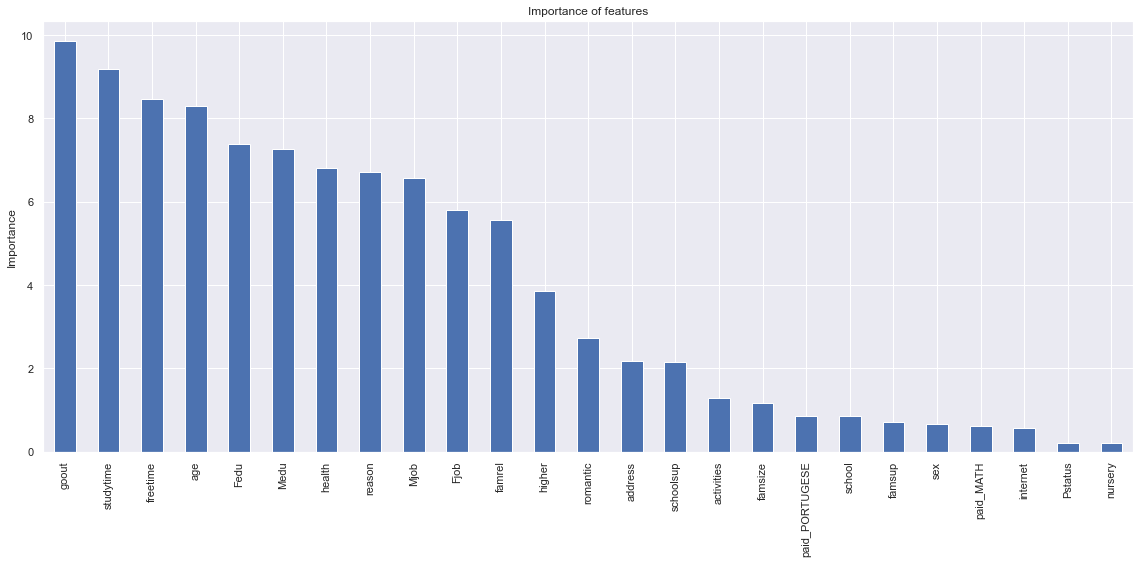

In [436]:
cat_feature_importance = clf.get_feature_importance()
cat_importances = pd.Series(cat_feature_importance, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(16,8))
cat_importances.plot.bar(ax=ax)
ax.set_title("Importance of features")
ax.set_ylabel("Importance")
fig.tight_layout()

In [293]:
from catboost import CatBoostClassifier
X = df.drop(numerical + ['good_at_math', 'mean_exams', 'mean_score', 'good_at_portugese', 'mean_absences', 'internet'], axis=1)
y = df['internet']
X = X.astype('category')
cat_fts = X.columns.to_list()
clf = CatBoostClassifier(random_state=42, iterations=2000, cat_features=cat_fts)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

clf.fit(X, y, verbose=100, plot=True, cat_features= cat_fts)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.003569
0:	learn: 0.6905380	total: 2.77ms	remaining: 5.54s
100:	learn: 0.5353655	total: 158ms	remaining: 2.98s
200:	learn: 0.4625047	total: 291ms	remaining: 2.6s
300:	learn: 0.4214267	total: 448ms	remaining: 2.53s
400:	learn: 0.3919420	total: 619ms	remaining: 2.47s
500:	learn: 0.3689739	total: 840ms	remaining: 2.51s
600:	learn: 0.3496662	total: 1.09s	remaining: 2.54s
700:	learn: 0.3305468	total: 1.32s	remaining: 2.45s
800:	learn: 0.3146004	total: 1.58s	remaining: 2.37s
900:	learn: 0.3003478	total: 1.82s	remaining: 2.22s
1000:	learn: 0.2867007	total: 2.08s	remaining: 2.08s
1100:	learn: 0.2748255	total: 2.33s	remaining: 1.9s
1200:	learn: 0.2630353	total: 2.56s	remaining: 1.7s
1300:	learn: 0.2529026	total: 2.79s	remaining: 1.5s
1400:	learn: 0.2424153	total: 3.04s	remaining: 1.3s
1500:	learn: 0.2317767	total: 3.29s	remaining: 1.09s
1600:	learn: 0.2226479	total: 3.54s	remaining: 882ms
1700:	learn: 0.2133165	total: 3.78s	remaining: 665ms
1800:	learn: 0.2045905	total: 4.

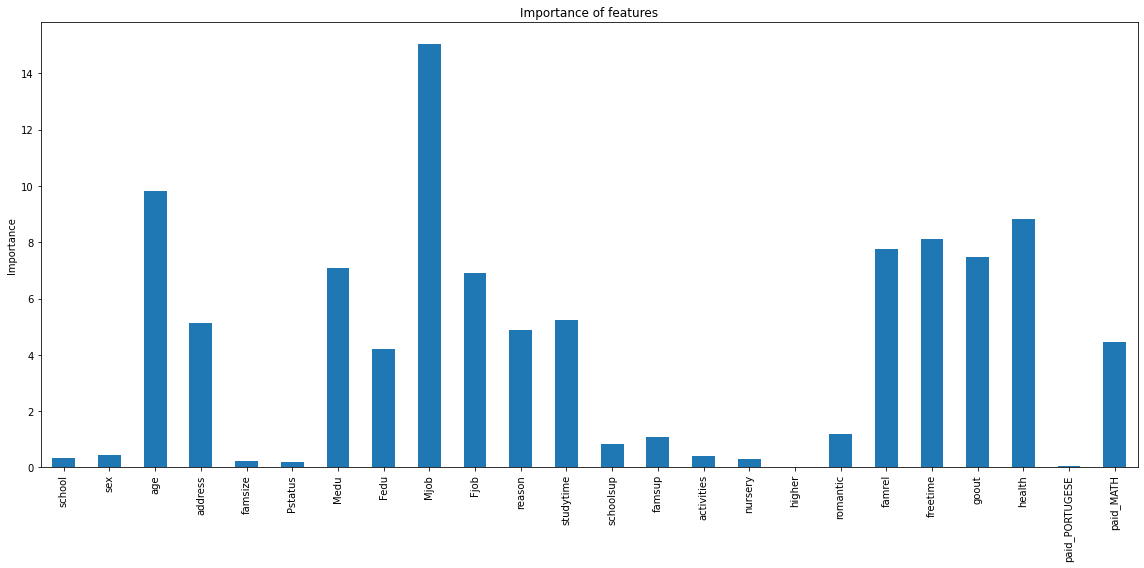

In [294]:
cat_feature_importance = clf.get_feature_importance()
cat_importances = pd.Series(cat_feature_importance, index=X.columns)

fig, ax = plt.subplots(figsize=(16,8))
cat_importances.plot.bar(ax=ax)
ax.set_title("Importance of features")
ax.set_ylabel("Importance")
fig.tight_layout()

In [325]:
imp_dict = dict(enumerate(X.columns.to_list()))
imp_dict

{0: 'school',
 1: 'sex',
 2: 'age',
 3: 'address',
 4: 'famsize',
 5: 'Pstatus',
 6: 'Medu',
 7: 'Fedu',
 8: 'Mjob',
 9: 'Fjob',
 10: 'reason',
 11: 'studytime',
 12: 'schoolsup',
 13: 'famsup',
 14: 'activities',
 15: 'nursery',
 16: 'higher',
 17: 'internet',
 18: 'romantic',
 19: 'famrel',
 20: 'freetime',
 21: 'goout',
 22: 'health',
 23: 'paid_PORTUGESE',
 24: 'paid_MATH'}

In [324]:
cat_feature_importance = clf.get_feature_importance(type='Interaction')
'''
for row in list(cat_feature_importance):
    row[0] = imp_dict[row[0]]
    row[1] = imp_dict[row[1]]
    print(row)
'''
cat_feature_importance

array([[ 2.        ,  7.        ,  2.54094686],
       [ 2.        , 21.        ,  2.47556841],
       [ 2.        , 11.        ,  2.28128899],
       [ 7.        , 21.        ,  2.25495356],
       [10.        , 11.        ,  2.05812722],
       [ 2.        , 20.        ,  2.04059507],
       [ 7.        , 19.        ,  1.94574782],
       [ 2.        ,  8.        ,  1.92474728],
       [ 7.        , 20.        ,  1.89621804],
       [ 7.        , 11.        ,  1.81415769],
       [ 8.        , 21.        ,  1.72380823],
       [ 7.        ,  9.        ,  1.69744706],
       [ 7.        , 10.        ,  1.67878235],
       [ 2.        ,  6.        ,  1.66341402],
       [ 9.        , 11.        ,  1.63824628],
       [ 2.        ,  9.        ,  1.57530075],
       [ 6.        , 21.        ,  1.52363105],
       [ 6.        ,  7.        ,  1.47525426],
       [ 9.        , 21.        ,  1.4696536 ],
       [ 7.        , 22.        ,  1.46618993],
       [ 6.        , 11.        ,  1.453

In [308]:
df = df[df.age < 20]

In [255]:
df.groupby('internet').mean()

,age,Medu,Fedu,studytime,famrel,freetime,goout,health,failures_PORTUGESE,absences_PORTUGESE,finalGrade_PORTUGESE,failures_MATH,absences_MATH,finalGrade_MATH,mean_score,mean_exams,good_at_math,good_at_portugese,mean_absences
internet,,,,,,,,,,,,,,,,,,,
no,16.789474,2.333333,2.263158,1.947368,3.824561,3.017544,2.877193,3.789474,0.263158,2.947368,11.982456,0.298246,3.666667,9.578947,10.780702,0.280702,0.421053,0.736842,3.307018
yes,16.536741,2.884984,2.610224,2.060703,3.955272,3.261981,3.159744,3.520767,0.108626,3.757188,12.658147,0.274760,5.693291,10.626198,11.642173,0.191693,0.546326,0.811502,4.725240


In [257]:
cat_df.groupby('internet').mean()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,studytime,schoolsup,famsup,activities,nursery,higher,romantic,famrel,freetime,goout,health,paid_PORTUGESE,paid_MATH,good_at_math,good_at_portugese
internet,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.157895,0.403509,1.789474,0.578947,0.228070,0.877193,2.333333,2.263158,1.491228,2.210526,1.210526,0.947368,0.157895,0.543860,0.438596,0.824561,0.964912,0.228070,2.824561,2.017544,1.877193,2.789474,0.052632,0.298246,0.421053,0.736842
1,0.095847,0.485623,1.533546,0.817891,0.290735,0.900958,2.884984,2.610224,2.309904,2.319489,1.265176,1.060703,0.127796,0.638978,0.530351,0.801917,0.955272,0.338658,2.955272,2.261981,2.159744,2.520767,0.070288,0.501597,0.546326,0.811502


In [305]:
df.groupby(['address','internet', 'Mjob', 'age'])['mean_score'].agg(['mean', 'count', 'median'])

mean  count  median
address internet Mjob     age                          
R       no       at_home  15    8.666667      3    8.00
                          16   13.000000      1   13.00
                          17   10.750000      4   11.00
                          18   10.900000      5   10.50
                 health   16   13.500000      1   13.50
                 other    16   10.000000      1   10.00
                          17   10.500000      3   11.50
                          18    7.250000      2    7.25
                          19    5.750000      2    5.75
                 services 17   14.500000      2   14.50
        yes      at_home  15   11.500000      1   11.50
                          17   10.100000      5    9.50
                          18   11.000000      1   11.00
                 health   15    9.500000      2    9.50
                 other    15   11.833333      3   12.00
                          16   14.000000      1   14.00
                          17    9.714286      7    9.50
                          18    9.600000     10    8.50
                          19    9.250000      2    9.25
                 services 15    9.500000      4   10.25
                          16   11.375000      4   11.25
                          17   10.500000      3   10.50
                          18   12.500000      2   12.50
                          19    5.000000      1    5.00
                 teacher  15   15.500000      1   15.50
                          16   12.500000      3   11.00
                          17   11.333333      3   12.00
                          18   12.000000      4   11.75
U       no       at_home  16   10.666667      3   11.50
                          17    8.250000      2    8.25
                          18    8.500000      1    8.50
                          19   10.000000      1   10.00
                 health   15    9.500000      1    9.50
                 other    15   11.333333      3   10.50
                          16   11.416667      6   11.25
                          17   11.333333      6   11.25
                          18    8.250000      2    8.25
                 services 16   11.000000      1   11.00
                          17   15.000000      2   15.00
                          18    9.500000      1    9.50
                          20   16.500000      1   16.50
                 teacher  15   14.500000      2   14.50
                          16    8.500000      1    8.50
        yes      at_home  15   11.000000      4   11.50
                          16    9.833333      6   10.50
                          17   11.000000      9   10.50
                          18   11.785714      7   10.00
                 health   15   12.214286      7   13.00
                          16   14.944444      9   15.50
                          17   13.333333      9   13.00
                          18   11.833333      3   12.00
                          19    6.500000      1    6.50
                 other    15   11.794118     17   11.50
                          16   11.328125     32   11.50
                          17   11.736842     19   12.00
                          18   10.812500     16   11.75
                          19   10.250000      2   10.25
                 services 15   12.476190     21   12.50
                          16   12.380952     21   12.50
                          17   12.531250     16   12.75
                          18   11.000000     11    9.50
                          19    9.000000      2    9.00
                          22    6.500000      1    6.50
                 teacher  15   12.791667     12   12.00
                          16   11.708333     12   11.75
                          17   11.857143      7   11.00
                          18   12.416667     12   12.00

In [318]:
df.groupby(['internet', 'Mjob', 'Medu'])['mean_score'].agg(['mean', 'count', 'median'])

mean  count  median
internet Mjob     Medu                          
no       at_home  0     10.000000      1   10.00
                  1     11.214286      7   10.50
                  2     10.666667      9   12.00
                  3      5.250000      2    5.25
                  4      8.500000      1    8.50
         health   4     11.500000      2   11.50
         other    1      8.642857      7   11.50
                  2     10.500000      6   11.00
                  3     11.437500      8   11.50
                  4      9.875000      4   11.00
         services 1     11.000000      1   11.00
                  2     17.000000      1   17.00
                  3     13.666667      3   13.00
                  4     10.500000      1   10.50
         teacher  4     12.500000      3   13.50
yes      at_home  0     15.000000      1   15.00
                  1     10.730769     13   11.00
                  2     10.625000     12   10.75
                  3     10.083333      6    9.75
                  4     15.000000      1   15.00
         health   1      9.000000      1    9.00
                  2      9.500000      2    9.50
                  3     11.900000      5   11.50
                  4     13.630435     23   13.50
         other    0     13.000000      1   13.00
                  1      9.500000     17    9.50
                  2     10.887500     40   11.50
                  3     11.696970     33   12.00
                  4     11.972222     18   12.00
         services 1     12.500000      3   13.00
                  2     11.115385     26   11.00
                  3     11.370968     31   11.50
                  4     13.100000     25   13.50
         teacher  3     11.500000      3   11.50
                  4     12.284314     51   12.00

In [339]:
df.groupby(['address', 'internet', 'famsup', 'Mjob'])['mean_score'].agg(['mean', 'count', 'median'])

mean  count  median
address internet famsup Mjob                              
R       no       no     at_home    9.642857      7   10.00
                        other      8.437500      8   10.75
                 yes    at_home   11.500000      6   11.50
                        health    13.500000      1   13.50
                        services  14.500000      2   14.50
        yes      no     at_home    4.500000      1    4.50
                        health     9.500000      1    9.50
                        other      9.812500      8    9.50
                        services   7.750000      2    7.75
                        teacher   14.125000      4   14.25
                 yes    at_home   11.416667      6   11.25
                        health     9.500000      1    9.50
                        other     10.233333     15    9.50
                        services  10.791667     12   10.75
                        teacher   11.214286      7   11.00
U       no       no     at_home   10.250000      2   10.25
                        health     9.500000      1    9.50
                        other     10.300000      5   11.00
                        services  12.000000      2   12.00
                 yes    at_home    9.300000      5   10.00
                        other     11.291667     12   11.25
                        services  13.250000      2   13.25
                        teacher   12.500000      3   13.50
        yes      no     at_home   11.590909     11   11.00
                        health    14.333333      6   13.25
                        other     11.812500     40   12.00
                        services  11.900000     25   12.50
                        teacher   13.142857     14   14.25
                 yes    at_home   10.466667     15   10.00
                        health    12.869565     23   13.00
                        other     11.021739     46   11.50
                        services  12.260870     46   12.50
                        teacher   11.793103     29   11.50

In [365]:
df.groupby(['address','internet', 'famsup', 'age', 'Mjob'])['mean_score'].agg(['mean', 'count', 'median'])

mean  count  median
address internet famsup age Mjob                              
R       no       no     15  at_home    8.000000      1    8.00
                        16  at_home   13.000000      1   13.00
                            other     10.000000      1   10.00
                        17  at_home    9.000000      3   10.00
                            other     10.500000      3   11.50
...                                         ...    ...     ...
U       yes      yes    18  services  11.666667      6   10.50
                            teacher   12.187500      8   12.00
                        19  health     6.500000      1    6.50
                            other     10.250000      2   10.25
                            services   9.000000      2    9.00

[101 rows x 3 columns]

In [455]:
df.groupby(['internet', 'famsup', 'Medu'])['mean_score'].agg(['mean']).to_excel('famsup_Medu.xls')
# Если дома помогают учиться, то интернет делает успеваемость хуже (дети смотрят больше развлекательного контента)
# Если дома не помогают, интернет делает успеваемость лучше (дети более самостоятельные, ответственные)
# Чем выше образование, тем эффективнее помощь дома (если она есть)
# Чем свободнее работа, тем чаще можно помогать ребёнку (возможно что родители слишком заняты, чтобы помогать, поэтому корреляция с работой)
# дети, у которых мама работает медиком, более самостоятельные и ответственные

/var/folders/6y/0mq5_kf5347crj38jj5xz8pr0000gn/T/ipykernel_20171/1931925410.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.groupby(['internet', 'famsup', 'Medu'])['mean_score'].agg(['mean']).to_excel('famsup_Medu.xls')


In [429]:
df.groupby(['address','internet', 'famsup'])['mean_score'].agg(['mean', 'count', 'median']).to_excel('famsup.xls')

/var/folders/6y/0mq5_kf5347crj38jj5xz8pr0000gn/T/ipykernel_20171/2164773351.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.groupby(['address','internet', 'famsup'])['mean_score'].agg(['mean', 'count', 'median']).to_excel('famsup.xls')


In [427]:
df[['school', 'address']].value_counts() ['MS'] /39

address
R    0.564103
U    0.435897
dtype: float64

In [372]:
df.address.value_counts()

U    287
R     81
Name: address, dtype: int64

In [315]:
df[df.higher == 'no']

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,studytime,schoolsup,famsup,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,failures_PORTUGESE,paid_PORTUGESE,absences_PORTUGESE,finalGrade_PORTUGESE,failures_MATH,paid_MATH,absences_MATH,finalGrade_MATH,mean_score,mean_exams,good_at_math,good_at_portugese,mean_absences
78,GP,M,17,U,GT3,T,2,1,other,other,home,1,yes,yes,yes,yes,no,yes,no,4,5,1,3,3,no,0,10,3,no,2,10,10.0,3.0,0.0,0.0,1.0
127,GP,F,19,U,GT3,T,0,1,at_home,other,course,2,no,yes,no,no,no,no,no,3,4,2,5,2,no,0,11,3,no,2,9,10.0,2.5,0.0,1.0,1.0
147,GP,M,16,U,GT3,T,4,4,teacher,teacher,course,1,no,yes,no,yes,no,yes,yes,3,3,2,5,0,no,16,8,0,no,0,0,4.0,0.0,0.0,0.0,8.0
149,GP,M,18,U,LE3,T,1,1,other,other,course,1,no,no,no,yes,no,yes,yes,2,3,5,4,2,no,0,0,3,no,0,0,0.0,2.5,0.0,0.0,0.0
152,GP,M,19,U,GT3,T,3,2,services,at_home,home,1,no,yes,no,yes,no,yes,yes,4,5,4,4,0,no,6,11,3,no,0,0,5.5,1.5,0.0,1.0,3.0
159,GP,M,17,R,LE3,T,2,1,at_home,other,course,1,no,no,yes,yes,no,yes,yes,3,3,2,5,1,yes,8,9,2,no,0,0,4.5,1.5,0.0,0.0,4.0
160,GP,M,17,R,LE3,T,1,1,other,services,course,2,no,no,yes,yes,no,no,yes,5,3,5,5,0,no,0,8,3,no,0,7,7.5,1.5,0.0,0.0,0.0
161,GP,M,16,U,GT3,T,2,2,other,other,course,2,no,no,no,yes,no,yes,no,4,3,5,4,0,no,0,11,0,no,4,10,10.5,0.0,0.0,1.0,2.0
234,GP,M,18,U,GT3,T,2,2,other,services,reputation,2,no,no,no,yes,no,yes,no,5,5,4,2,0,no,16,8,1,no,0,0,4.0,0.5,0.0,0.0,8.0
245,GP,M,18,U,GT3,T,3,2,services,other,course,1,no,no,no,yes,no,yes,no,4,4,5,5,0,no,8,7,1,no,0,8,7.5,0.5,0.0,0.0,4.0


In [350]:
df.groupby(['address', 'internet','Mjob'])['mean_score'].agg(['mean', 'count', 'median'])

mean  count  median
address internet Mjob                              
R       no       at_home   10.500000     13   10.50
                 health    13.500000      1   13.50
                 other      8.437500      8   10.75
                 services  14.500000      2   14.50
        yes      at_home   10.428571      7   11.00
                 health     9.500000      2    9.50
                 other     10.086957     23    9.50
                 services  10.357143     14   10.50
                 teacher   12.272727     11   12.00
U       no       at_home    9.571429      7   10.00
                 health     9.500000      1    9.50
                 other     11.000000     17   11.00
                 services  12.625000      4   12.00
                 teacher   12.500000      3   13.50
        yes      at_home   10.942308     26   10.75
                 health    13.172414     29   13.00
                 other     11.389535     86   11.75
                 services  12.133803     71   12.50
                 teacher   12.232558     43   12.00

In [382]:
df.groupby(['internet'])['finalGrade_MATH'].agg(['mean', 'count', 'median']).to_excel('math.xls')

/var/folders/6y/0mq5_kf5347crj38jj5xz8pr0000gn/T/ipykernel_20171/459366172.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.groupby(['internet'])['finalGrade_MATH'].agg(['mean', 'count', 'median']).to_excel('math.xls')


In [383]:
df.groupby(['internet'])['finalGrade_PORTUGESE'].agg(['mean', 'count', 'median']).to_excel('portugese.xls')

/var/folders/6y/0mq5_kf5347crj38jj5xz8pr0000gn/T/ipykernel_20171/22416472.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.groupby(['internet'])['finalGrade_PORTUGESE'].agg(['mean', 'count', 'median']).to_excel('portugese.xls')


In [ ]:
мамы нет дома постоянно
меньший контроль за ребёнком
ребёнок более самостоятелен => повышает успехи

если в здравоохранении или учитель

делить оценку на класс

почти все хотят высшее образование

In [333]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
clusters = model.fit_predict(cat_df)

In [334]:
cat_df['cluster'] = clusters

In [337]:
cat_df['cluster'].value_counts()

0    106
3     97
1     84
2     83
Name: cluster, dtype: int64

In [338]:
cat_df[cat_df.cluster == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,studytime,schoolsup,famsup,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,paid_PORTUGESE,paid_MATH,good_at_math,good_at_portugese,cluster
1,0,0,2,1,0,1,1,1,0,2,0,1,0,1,0,0,1,1,0,4,2,2,2,0,0,0,1,0
2,0,0,0,1,1,1,1,1,0,2,2,1,1,0,0,1,1,1,0,3,2,1,2,0,1,0,1,0
11,0,0,0,1,0,1,2,1,3,2,3,2,0,1,1,1,1,1,0,4,1,1,3,0,0,1,1,0
14,0,1,0,1,0,0,2,2,2,2,1,2,0,1,0,1,1,1,1,3,4,1,2,0,0,1,1,0
25,0,0,1,1,0,1,2,2,3,3,1,0,0,1,0,0,1,1,0,0,1,1,4,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1,1,3,0,1,1,1,2,0,3,2,0,0,1,1,1,0,1,1,3,2,2,2,0,1,1,0,0
351,1,0,2,1,0,1,2,2,2,0,1,2,0,0,1,1,1,0,1,2,3,2,2,0,0,1,1,0
354,1,0,3,0,0,1,1,1,2,2,1,2,0,0,0,1,1,1,0,3,2,1,3,0,0,0,1,0
363,1,0,3,0,0,1,2,2,0,2,2,2,0,0,0,1,1,0,0,4,2,2,3,0,1,0,1,0


In [442]:
df[['mean_score', 'age']]

,mean_score,age
0,8.5,18
1,8.5,17
2,11.0,15
3,14.5,15
4,11.5,16
...,...,...
365,5.0,19
366,12.0,18
367,4.5,18
368,13.0,17


<AxesSubplot:xlabel='age', ylabel='mean_score'>

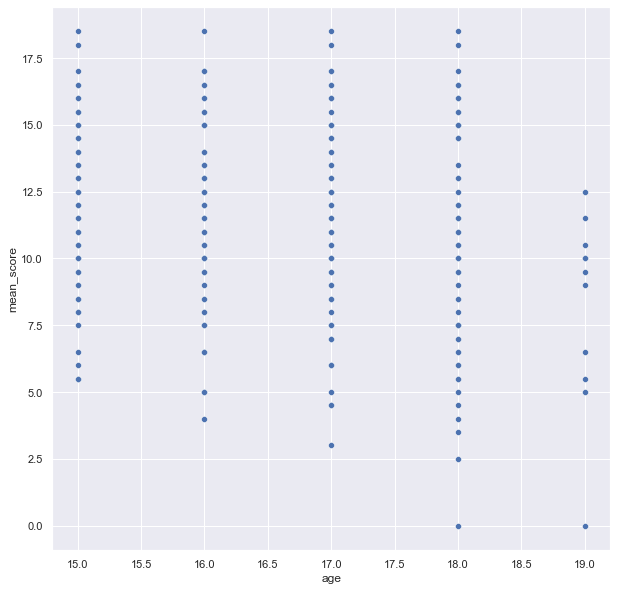

In [439]:
plt.rcParams['figure.figsize']=(10, 10)
sns.scatterplot(y='mean_score', x='age', data=df)

<AxesSubplot:xlabel='mean_absences', ylabel='internet'>

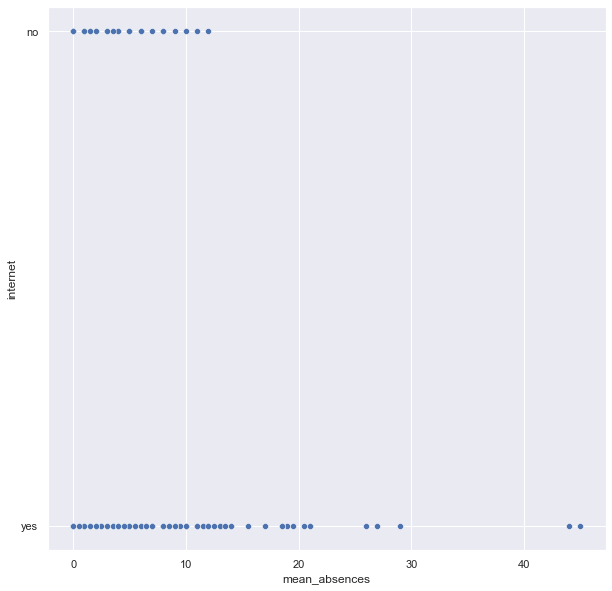

In [448]:
plt.rcParams['figure.figsize']=(10, 10)
sns.scatterplot(y='internet', x='mean_absences', data=df)

In [ ]:
'internet', 'Medu', 'Fedu', 'Mjob', 'higher', 'reason', 'age'

Образование родителя (корреляция с Medu, Fedu) => Воспитание ребёнка ведётся более ответственно и умно => Ребёнку переходят ценности, опыт и даже гены, он тоже хочет получать высшее образование (корреляция оценки с higher) => 